<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [47]:
import os
import glob
import biom
import numpy as np
import pandas as pd
import xarray as xr
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = '../sfari/data/sra'

folders = [
    'Zou2020',
    'Fasano2020',
    'Fouquier2021',
    'Chen2020',
    'Dan2020',
    'Zurita2019',
    'Berding2020'
]

kang_directory = '../sfari/data/sra/Kang2017'
benchmarking_dir = '../sfari/data/sra/Benchmarking'

from util import extract_differentials, ranking
from scipy.stats import pearsonr, spearmanr
%matplotlib inline

In [48]:
amp_fname = f'{kang_directory}/week0_ogu/differentials-v8.nc'
combined_diff = extract_differentials(amp_fname)
all_diffs = [extract_differentials(f'{data_dir}/{x}/age_sex_matched_posterior') for x in folders ]
all_bioms = [biom.load_table(f'{data_dir}/{x}/deblur/ogus.biom') for x in folders]

In [49]:
mean_diff = combined_diff.mean(axis=1).sort_values()
combined_diff = combined_diff.loc[mean_diff.index]
combined_diff = combined_diff - combined_diff.mean(axis=0)

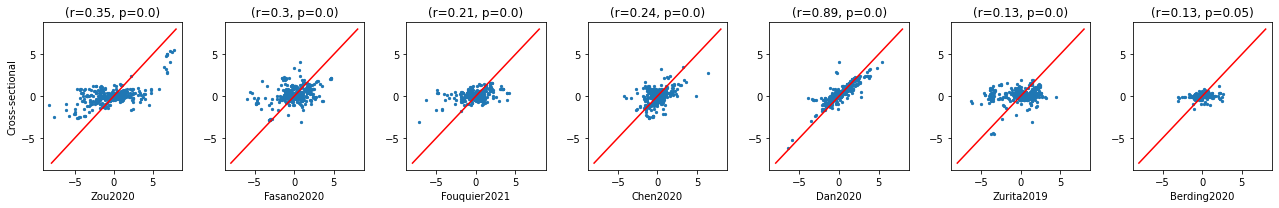

In [50]:
fig, ax = plt.subplots(1, len(all_diffs), figsize=(18, 3))
for i, diff in enumerate(all_diffs):
    title = folders[i]
    taxa_total = all_bioms[i].sum(axis='observation')
    taxa = all_bioms[i].ids(axis='observation')
    idx = taxa[taxa_total > 0]
    mean_diff2 = mean_diff.loc[idx].sort_values()
    diff = diff.loc[mean_diff2.index]
    diff = diff - diff.mean(axis=0)

    #plt.errorbar(x=mean_diff.values, y=diff.mean(axis=1), yerr=diff.std(axis=1), fmt='o')
    ax[i].scatter(diff.mean(axis=1), mean_diff2.values, s=5)
    idx = np.linspace(-8, 8)
    ax[i].plot(idx, idx, c='r')
    #ax[i].set_ylim([-6, 6])
    #ax[i].set_xlim([-6, 6])
    r, p = pearsonr(mean_diff2.values, diff.mean(axis=1))
    r = np.round(r, 2)
    p = np.round(p, 2)
    ax[i].set_title(f'(r={r}, p={p})')
    ax[i].set_xlabel(title)
ax[0].set_ylabel('Cross-sectional')
#plt.show()
plt.tight_layout()

In [38]:
from numba import jit

@jit
def rank_equal(X, Y):
    n_features, n_draws = X.shape
    Z = np.zeros((n_features, n_features))
    for xi in range(n_features):
        for yj in range(n_features):
            Z[xi, yj] = np.mean(X[xi] == Y[yj])
    return Z

def rank_histogram_2d(x, y):
    x_ranks = x.apply(np.argsort)
    y_ranks = y.apply(np.argsort)
    Z = rank_equal(x_ranks.values, y_ranks.values)
    return Z

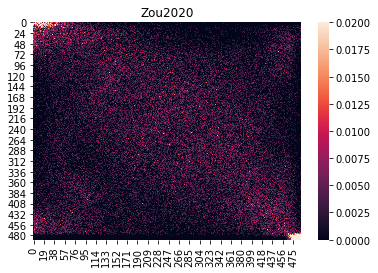

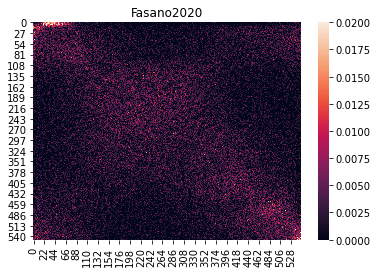

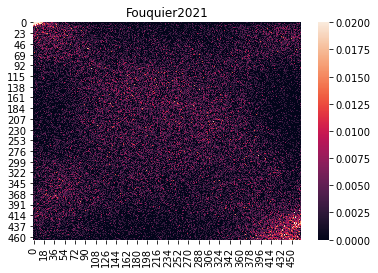

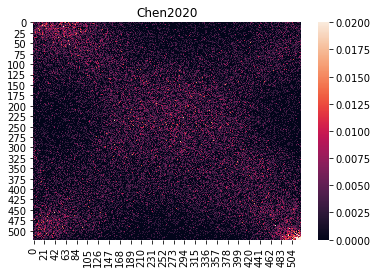

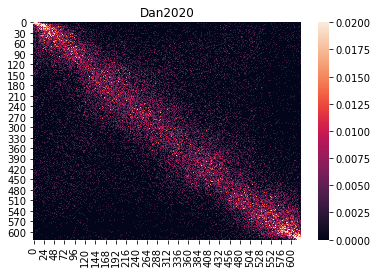

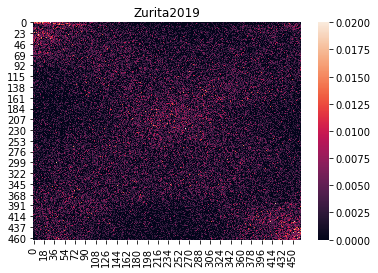

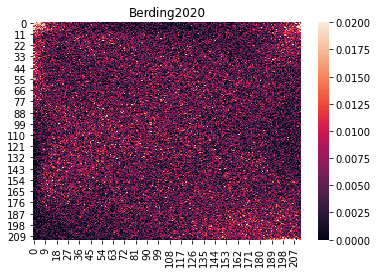

In [46]:
for i, diff in enumerate(all_diffs):
    title = folders[i]
    taxa_total = all_bioms[i].sum(axis='observation')
    taxa = all_bioms[i].ids(axis='observation')
    idx = taxa[taxa_total > 0]
    mean_diff2 = mean_diff.loc[idx].sort_values()
    diff = diff.loc[mean_diff2.index]
    diff = diff - diff.mean(axis=0)    
    Z = rank_histogram_2d(combined_diff.loc[diff.index], diff)
    sns.heatmap(Z, vmax=0.02)
    plt.title(title)
    plt.show()

In [ ]:
for i, diff in enumerate(all_diffs):
    title = folders[i]
    taxa_total = all_bioms[i].sum(axis='observation')
    taxa = all_bioms[i].ids(axis='observation')
    idx = taxa[taxa_total > 0]
    mean_diff2 = mean_diff.loc[idx].sort_values()
    diff = diff.loc[mean_diff2.index]
    diff = diff - diff.mean(axis=0)    
    Z = rank_histogram_2d(combined_diff.loc[diff.index], diff)
    sns.heatmap(Z, vmax=0.02)
    plt.title(title)
    plt.show()